In [9]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

all_files = glob(os.path.join("data/spotify_streaming_history", "*.json"))
ind_df = (pd.read_json(f) for f in all_files)
df = (
    pd.concat(ind_df, ignore_index=True)
)
df["ts"] = pd.to_datetime(df["ts"])

df = df.set_index("ts")
df["year"] = df.index.year
df

,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
ts,,,,,,,,,,,,,,,,,,,
2017-01-18 11:53:58+00:00,"Android OS 4.1.2 API 16 (samsung, GT-I9070P)",185440,DE,82.113.106.43,You Gotta Not,Little Mix,You Gotta Not,spotify:track:1YsK7uP9LHlqJJO3FHrKTb,None,None,None,playbtn,endplay,True,False,0.0,NaN,False,2017
2017-01-18 11:54:09+00:00,"Android OS 4.1.2 API 16 (samsung, GT-I9070P)",10283,DE,82.113.106.43,Spirit of the Bergmanu,OliverMusik,Spirit of the Bergmanu,spotify:track:6wbFo0zvzfwocOsLa1X5rl,None,None,None,clickrow,fwdbtn,True,False,0.0,NaN,False,2017
2017-01-18 11:54:49+00:00,"Android OS 4.1.2 API 16 (samsung, GT-I9070P)",38648,DE,82.113.106.43,"Dada, Dödö Song (GermanLetsPlay)",OliverMusik,Das Youtuber Album,spotify:track:7lKj8Avt4f0ziea3pSQD7j,None,None,None,fwdbtn,fwdbtn,True,False,0.0,NaN,False,2017
2017-01-18 11:54:55+00:00,"Android OS 4.1.2 API 16 (samsung, GT-I9070P)",6540,DE,82.113.106.43,Der Prinz Von Bel-Air (Cover GermanLetsPlay),OliverMusik,Das Youtuber Album,spotify:track:1STlIUInhFhcYNMqbm27h0,None,None,None,fwdbtn,fwdbtn,True,False,0.0,NaN,False,2017
2017-01-18 11:55:49+00:00,"Android OS 4.1.2 API 16 (samsung, GT-I9070P)",54435,DE,82.113.106.43,Manumehl,OliverMusik,Manumehl,spotify:track:2MGwLzzwxHX8NH9PccWnYq,None,None,None,fwdbtn,fwdbtn,True,False,0.0,NaN,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06 08:12:06+00:00,ios,4249,DE,46.114.154.39,Fürchte dich nicht,O'Bros,Freue dich Welt,spotify:track:1tp8nTB7VPtsRkYBkO6nWS,None,None,None,trackdone,fwdbtn,True,True,0.0,1.701850e+09,False,2023
2023-12-06 08:15:58+00:00,ios,233647,DE,46.114.154.39,Messias,YADA Worship,Freue dich Welt,spotify:track:7jk2kag37YqjhfgmKNV5D2,None,None,None,fwdbtn,trackdone,True,False,0.0,1.701850e+09,False,2023
2023-12-06 16:50:59+00:00,ios,136361,DE,46.114.154.39,Freue dich Welt,Outbreakband,Freue dich Welt,spotify:track:6tIZo4NpJtoxRP6APhRuBc,None,None,None,trackdone,fwdbtn,True,True,0.0,1.701851e+09,False,2023


<Axes: >

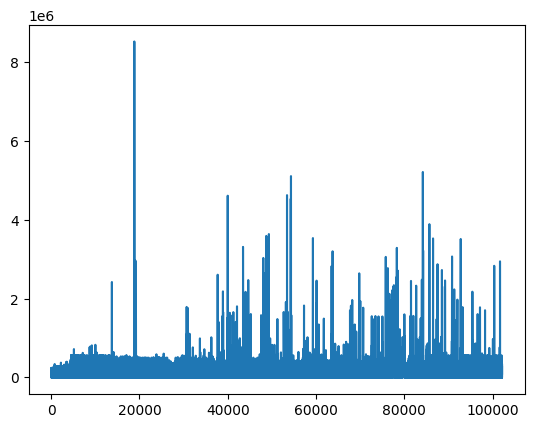

In [45]:
df["ms_played"].plot()

In [25]:
df["master_metadata_track_name"].value_counts().index[:100]

Index(['The Glory of the Cross', 'Sein wie Du', 'Good Good Father',
       'Mutig komm ich vor den Thron', 'Retter dieser Welt',
       'Sooner Count the Stars', 'Nothing but the Blood of Jesus',
       'Näher zu dir', 'The Glories of Calvary',
       'You Are My King (Amazing Love)', 'Sola Gratia', 'Jesus, Thank You',
       '10,000 Reasons (Bless The Lord) - Live', 'Time',
       'My Hope Is Built / The Solid Rock', 'Love Broke Thru',
       'I Stand in Awe', 'Du machst alles neu', 'You Alone Can Rescue',
       'Our God', 'Oh My Soul', 'I Stand Amazed', 'Behold Our God',
       'Welche Liebe - Unplugged', 'Build Your Kingdom Here',
       'All I Have Is Christ', 'My Lighthouse', 'Sparrows', 'Halleluja',
       'In Christus', 'By Your Side', 'Way Maker - Live', 'ZIEL',
       'Oh am Kreuz', 'The Proof of Your Love',
       'Welch ein Freund ist unser Jesus', 'Who Am I', 'Mittelpunkt - Live',
       'Turn Your Eyes Upon Jesus', 'Only Jesus', 'Praise You In This Storm',
       'Ich fol

In [33]:
df[df["master_metadata_album_artist_name"]=="Sovereign Grace Music"]["ms_played"].sum()

np.int64(1131687922)

In [ ]:
df["ms_played"].sum()/(1000*60*60*24)

np.float64(3961.6041044444446)

In [39]:
df["spotify_track_uri"].unique().shape[0]

15578

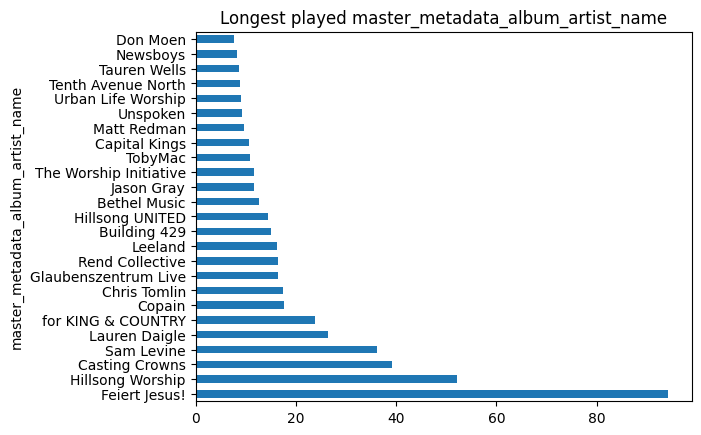

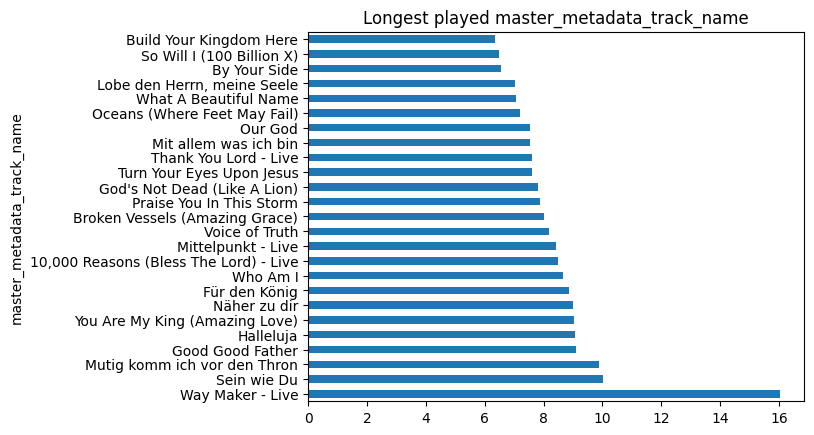

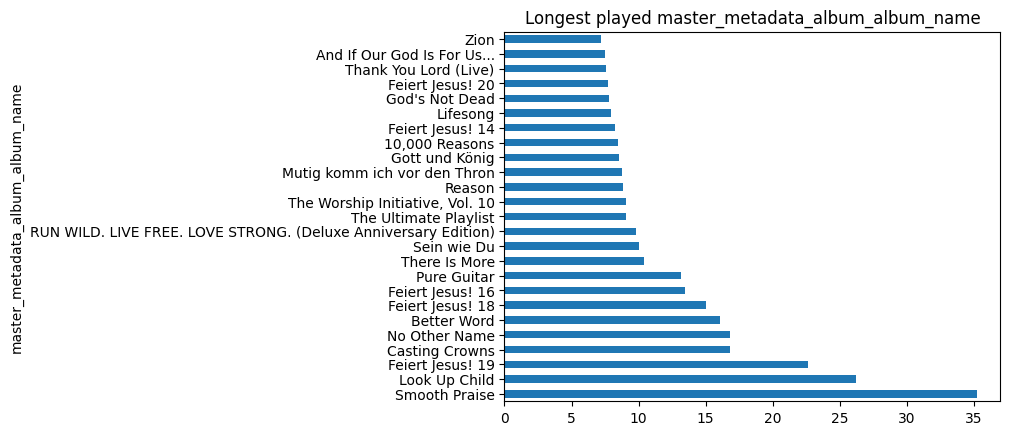

In [32]:
by_attribute = "master_metadata_album_artist_name"
by_attribute = "master_metadata_track_name"
for attr in ["master_metadata_album_artist_name",  "master_metadata_track_name", "master_metadata_album_album_name"]:
    # plt.tight_layout()
    (
        df
        [df["year"]==2020]
        [[attr, "ms_played"]]
        .groupby(attr)
        .sum(numeric_only=True)
        .sort_values("ms_played", ascending=False)
        .head(25)
        .divide(1000*60*60)
        .plot(
            kind="barh",
            title=f"Longest played {attr}",
            legend=False,
        )
    )

In [23]:
df[df["year"]==2023]

,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
ts,,,,,,,,,,,,,,,,,,,
2023-03-19 07:23:20+00:00,ios,0,DE,46.114.217.113,Day One (Interstellar Theme),Hans Zimmer,Interstellar (Original Motion Picture Soundtrack),spotify:track:4WmB04GBqS4xPMYN9dHgBw,None,None,None,unknown,endplay,False,True,NaN,NaN,False,2023
2023-03-19 07:23:22+00:00,ios,0,DE,46.114.217.113,Candles,Jon Hopkins,Monsters (Original Motion Picture Soundtrack),spotify:track:7aS8e5XKVWDcbyn06mF9fz,None,None,None,unknown,endplay,False,True,NaN,NaN,False,2023
2023-03-19 07:23:25+00:00,ios,0,DE,46.114.217.113,Candles,Jon Hopkins,Monsters (Original Motion Picture Soundtrack),spotify:track:7aS8e5XKVWDcbyn06mF9fz,None,None,None,unknown,endplay,False,True,NaN,NaN,False,2023
2023-03-19 07:23:27+00:00,ios,0,DE,46.114.217.113,Patience Is A Virtue,Clem Leek,Rest,spotify:track:2KJkKZ6u3QRm9Xpu5I2CPB,None,None,None,unknown,endplay,False,True,NaN,NaN,False,2023
2023-03-19 07:23:27+00:00,ios,0,DE,46.114.217.113,Precipice,The Flashbulb,Piety of Ashes,spotify:track:4CHIJuqR1jLfzA72THSzUm,None,None,None,unknown,endplay,False,True,NaN,NaN,False,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06 08:12:06+00:00,ios,4249,DE,46.114.154.39,Fürchte dich nicht,O'Bros,Freue dich Welt,spotify:track:1tp8nTB7VPtsRkYBkO6nWS,None,None,None,trackdone,fwdbtn,True,True,0.0,1.701850e+09,False,2023
2023-12-06 08:15:58+00:00,ios,233647,DE,46.114.154.39,Messias,YADA Worship,Freue dich Welt,spotify:track:7jk2kag37YqjhfgmKNV5D2,None,None,None,fwdbtn,trackdone,True,False,0.0,1.701850e+09,False,2023
2023-12-06 16:50:59+00:00,ios,136361,DE,46.114.154.39,Freue dich Welt,Outbreakband,Freue dich Welt,spotify:track:6tIZo4NpJtoxRP6APhRuBc,None,None,None,trackdone,fwdbtn,True,True,0.0,1.701851e+09,False,2023
